Section 0
Nama : Nur Ulfah Atiqah 
Npm : 2008108010050
Video Link: https://drive.google.com/drive/folders/17TaockxqcGBU-E0M4WIQoqubEKiVByZ3?usp=sharing

Section 1: Introductions
World Happiness Report 2021
Laporan Kebahagiaan Dunia 2021

Latar Belakang
Pada dataset ini saya ingin melakukan pengurutan 10 negara yang memiliki penduduk dengan tingkat kebahagiaan tertinggi dan 10 negara yang memiliki penduduk  dengan tingkat kebahagiaan terendah. Saya juga ingin melihat tingkat kebahagiaan berdasarkan wilayah-wilayah di dunia. Serta, negara mana yang memiliki penduduk dengan tingkat kebahagiaan tertinggi dan terendah

Dataset ini merupakan data yang diambil dari Kaggle.com
Dengan Variabel:

Ladder score: Skor kebahagiaan atau kesejahteraan secara subjektif

Logged GDP per capita: Rangkaian waktu PDB per kapita dari 2019 hingga 2020

Social support: dukungan sosial dari orang-orang

Healthy life expectancy: Harapan hidup sehat saat lahir 

Freedom to make life choices: Tanggapan tentang kepuasan seseorang dalam kebebasannya memelih jalan hidup

Generosity: Kedermawanan

Perceptions of corruption: Keadaan dari korupsi di berbagai bidang

Ladder score in Dystopia:  Skor kebagiaan dengan Dystopia(suatu komunitas mayarakat) sebagai patokan



Section 2: Data Preprocessing

In [1]:
#libraries
import numpy as np #untuk menangani angka
import pandas as pd #untuk menangani dataset
import seaborn as sns #untuk menangani grafik
import matplotlib.pyplot as plt #untuk menangani visualisasi data
%matplotlib inline
from sklearn.impute import SimpleImputer #untuk menangani data yg hilang

dataset = pd.read_csv('E:happiness.csv',encoding="ISO-8859-1") #import dataset
dataset.head()


,ï»¿Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [23]:
#Memisahkan atribut menjadi independen dan dependen
x = dataset.iloc[:, :-1].values #atribut untuk menentukan variabel terikat
y = dataset.iloc[:, -1].values #variabel terikat/kelas

print (x)
print (y)


[['Finland' 'Western Europe' 7.8420000000000005 ... 0.691 0.124
  0.48100000000000004]
 ['Denmark' 'Western Europe' 7.62 ... 0.6859999999999999
  0.20800000000000002 0.485]
 ['Switzerland' 'Western Europe' 7.571000000000001 ... 0.653 0.204 0.413]
 ...
 ['Rwanda' 'Sub-Saharan Africa' 3.415 ... 0.627 0.22699999999999998 0.493]
 ['Zimbabwe' 'Sub-Saharan Africa' 3.145 ... 0.359 0.157 0.075]
 ['Afghanistan' 'South Asia' 2.523 ... 0.0 0.122 0.01]]
[3.253 2.868 2.839 2.967 2.798 2.58  2.683 2.653 2.612 2.784 2.598 3.083
 2.824 2.585 2.384 3.387 2.596 3.124 2.807 2.862 2.521 2.631 2.268 2.687
 2.422 2.668 2.513 2.794 2.388 3.375 2.6   1.379 3.182 2.714 3.015 2.961
 3.135 2.624 2.578 2.103 2.509 2.477 2.682 2.438 2.446 2.83  2.368 2.682
 3.085 2.462 2.536 2.794 2.432 2.309 2.841 2.048 2.461 2.225 2.934 2.325
 2.872 2.262 2.744 2.583 2.665 2.653 2.648 2.561 2.805 2.492 2.306 2.254
 2.178 1.653 2.247 2.148 1.236 2.619 2.211 2.331 1.784 1.987 3.476 1.982
 3.469 2.127 2.642 1.823 1.52  1.919 3.195 

In [3]:
#menangani nilai kosong
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='constant')
imputer = imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

print(x[:, 1:3])

NameError: name 'np' is not defined

Section 3: Data Processing

In [24]:
#Pengelompokan berdasarkan wilayah
def set_region_label(regional_indicator):
    if regional_indicator in ['Central and Eastern Europe', 'Western Europe']:
        return 'Europe'
    elif regional_indicator in ['East Asia', 'South Asia', 'Southeast Asia']:
        return 'Asia'
    elif regional_indicator in ['Middle East and North Africa', 'Sub-Saharan Africa']:
        return 'Africa'
    elif regional_indicator == 'Commonwealth of Independent States':
        return 'Commonwealth of Independent States'
    elif regional_indicator == 'Latin America and Caribbean':
        return 'Latin America and Caribbean'
    elif regional_indicator == 'North America and ANZ':
        return 'North America and ANZ'

dataset['region_label'] = dataset['Regional indicator'].apply(set_region_label)

dataset['region_label'].value_counts()
    

Africa                                53
Europe                                38
Asia                                  22
Latin America and Caribbean           20
Commonwealth of Independent States    12
North America and ANZ                  4
Name: region_label, dtype: int64

In [26]:
#Pandangan umum tentang ukuran kebahagiaan di tahun 2021
summary_region = dataset[['Regional indicator', 'Ladder score', 'region_label']].groupby(['region_label', 'Regional indicator']).agg(['count','mean','max','min','median'])
summary_region.columns = ['{}_{}'.format(col[0], col[1]) for col in summary_region.columns]
summary_region.reset_index(inplace = True)
summary_region

,region_label,Regional indicator,Ladder score_count,Ladder score_mean,Ladder score_max,Ladder score_min,Ladder score_median
0,Africa,Middle East and North Africa,17,5.219765,7.157,3.658,4.8870
1,Africa,Sub-Saharan Africa,36,4.494472,6.049,3.145,4.6160
2,Asia,East Asia,6,5.810333,6.584,5.339,5.7610
3,Asia,South Asia,7,4.441857,5.269,2.523,4.9340
4,Asia,Southeast Asia,9,5.407556,6.377,4.426,5.3840
5,Commonwealth of Independent States,Commonwealth of Independent States,12,5.467000,6.179,4.875,5.4715
6,Europe,Central and Eastern Europe,17,5.984765,6.965,5.101,6.0780
7,Europe,Western Europe,21,6.914905,7.842,5.536,7.0850
8,Latin America and Caribbean,Latin America and Caribbean,20,5.908050,7.069,3.615,5.9920
9,North America and ANZ,North America and ANZ,4,7.128500,7.277,6.951,7.1430


In [27]:
#Nilai level kebagiaan dan ketidakbahagiaan berdasarkan wilayah
happiest_countries = dataset.sort_values('Ladder score', ascending = False).head(10)
happiest_countries['level'] = 'happiest'
unhappiest_countries = dataset.sort_values('Ladder score', ascending = True).head(10)
unhappiest_countries['level'] = 'unhappiest'

top_countries = pd.concat([happiest_countries, unhappiest_countries], ignore_index=True)

top_countries.groupby('region_label')['level'].value_counts().sort_values().unstack().fillna(0)


level,happiest,unhappiest
region_label,,
Africa,0.0,8.0
Asia,0.0,1.0
Europe,9.0,0.0
Latin America and Caribbean,0.0,1.0
North America and ANZ,1.0,0.0


In [53]:
#Negara dengan penduduk yang memiliki tingkat kebahagiaan tertinggi di tahun 2021

print("Where lived the most happy people in 2021?")
'They are living in {}.'.format(dataset[dataset['Ladder score']== max(dataset['Ladder score'])]['ï»¿Country name'].to_string(index = False))



Where lived the most happy people in 2021?


'They are living in  Finland.'

In [52]:
#Negara dengan penduduk yang memiliki tingkat kebahagiaan terendah di tahun 2021

print("Where lived the least happy people in 2021?")
'They are living in {}.'.format(dataset[dataset['Ladder score']== min(dataset['Ladder score'])]['ï»¿Country name'].to_string(index = False))


Where lived the least happy people in 2021?


'They are living in  Afghanistan.'

Section 4: Data Visualization

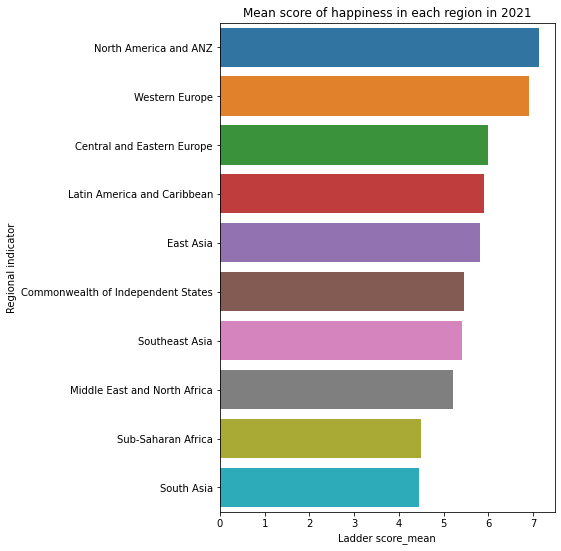

In [29]:
#Grafik kebahagiaan berdasarkan wilayah

summary_region.sort_values(by = 'Ladder score_mean', ascending = False, inplace = True)

plt.figure(figsize=(6,9))
region_plot_score = sns.barplot(x=summary_region['Ladder score_mean'], y=summary_region['Regional indicator'])
region_plot_score.set(title='Mean score of happiness in each region in 2021');
    

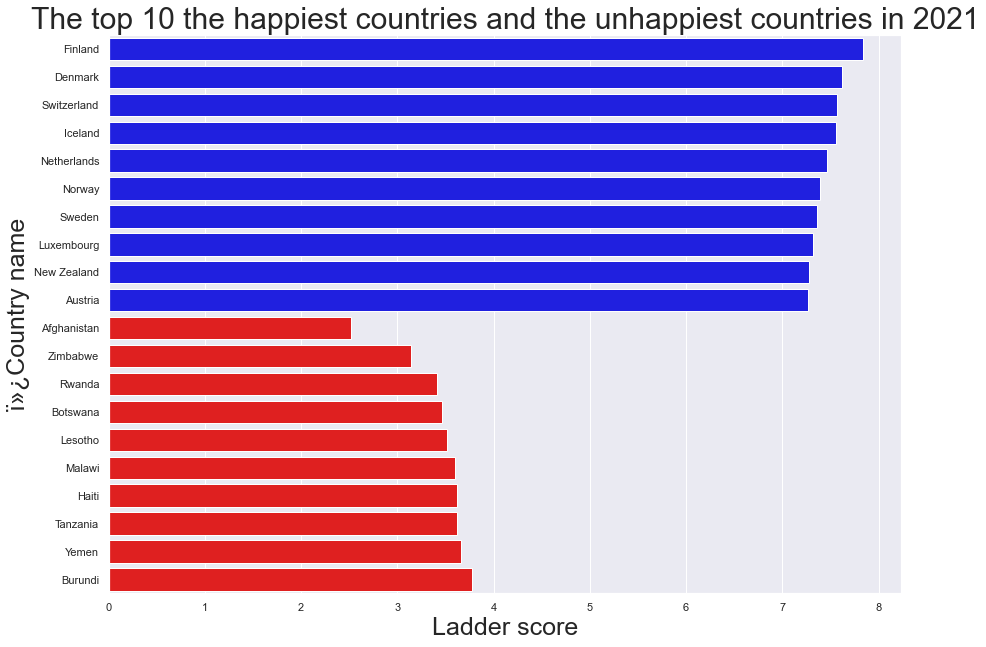

In [48]:
#Grafik 10 negara dengan tingkat kebahagiaan tertinggi dan terendah
colors_if = ['red' if x < 7 else 'blue' for x in top_countries['Ladder score']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
pp = sns.barplot(x="Ladder score", y="ï»¿Country name", data=top_countries, label="Ladder score", palette = colors_if);

pp.set_title('The top 10 the happiest countries and the unhappiest countries in 2021', size = 30);
pp.set_xlabel(pp.get_xlabel(), fontsize=20)
pp.set_ylabel(pp.get_ylabel(), fontsize=20);

Section 5: Conclusion
Dari data "World Happiness Report 2021" yang diambil dari Kaggle.com diperoleh bahwa  wilayah di dunia yang memiliki tingkat kebahagiaan tertinggi adalah Eropa. Hasil ini berbanding lurus dengan negara yang memiliki tingkat kebahagiaan tertinggi yaitu Finlandia yang berada di benua Eropa. Sedangkan, wilayah yang memiliki tingkat kebahagiaan terendah adalah Afrika. Negara yang memiliki tingkat kebahagiaan terendah adalah Afghanistan yang berada di Asia Selatan. Asia Selatan merupakan regional indicator yang memiliki tingkat kebahagiaan terendah. Adapun 10 negara yang memiliki tingkat kebahagiaan tertinggi, yaitu: Finland, Denmark, Swizerland, Iceland, Netherlands, Norway, Sweden, Luxemburg, New Zealand, dan Austria. Sedangkan, 10 negara yang memiliki tingkat kebahagiaan terendah adalah: Afghanistan, Zimbabwe, Rwanda, Botswana, Lesotho, Malawi, Haiti, Tanzania, Yemen, dan Burundi.